In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt

In [9]:

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(coord1, coord2):
    return sqrt((coord1[0] - coord2[0])*2 + (coord1[1] - coord2[1])*2)


In [10]:
# Baca dataset dari file CSV
file_path = 'Bali Dataset - FIX.csv'  # Sesuaikan dengan path Anda
data = pd.read_csv(file_path)
data = data.drop(163)
selected_indices = [11, 8, 9, 40, 17, 39, 14, 15, 33]
data = data.loc[selected_indices]
print(data)
# Perbaikan data
data = data.dropna(subset=['palce', 'lat', 'long'])



# Pastikan semua nilai koordinat valid dan konversi ke tipe yang tepat
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')

# Buang baris yang masih memiliki NaN setelah konversi
data = data.dropna(subset=['lat', 'long'])

# Mengecek data setelah pembersihan
print(data.head())

    index                           palce  \
11   11.0             Pantai Teluk Terima   
8     8.0              Pantai Candikusuma   
9     9.0                 Pantai Pebuahan   
40   40.0                 Bendungan Benel   
17   17.0        Air Terjun Kayangan Sawe   
39   39.0  Wisata Puncak JR Jembrana Bali   
14   14.0            Air Terjun Yeh Mesee   
15   15.0             Sidi Tapa Waterfall   
33   33.0             Air Terjun Yeh Buah   

                                                  url  is_accessibility  \
11  https://www.google.com/maps/place/Pantai+Karan...               0.0   
8   https://www.google.com/maps/place/Pantai+Candi...               0.0   
9   https://www.google.com/maps/place/Pantai+Pebua...               0.0   
40  https://www.google.com/maps/place/Bendungan+Be...               0.0   
17  https://www.google.com/maps/place/Air+Terjun+K...               0.0   
39  https://www.google.com/maps/place/Wisata+Punca...               0.0   
14  https://www.google.c

In [12]:
# Mengelompokkan destinasi ke dalam kelompok yang terdiri dari 3 destinasi
# Karena KMeans tidak bisa secara langsung mengelompokkan ke dalam kelompok dengan ukuran tertentu,
# kita perlu memperkirakan jumlah cluster yang akan menghasilkan kelompok dengan ukuran sekitar 3.

num_clusters = 3  # Perkiraan jumlah cluster

# Menerapkan KMeans clustering
coordinates = data[['lat', 'long']].values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(coordinates)
data['cluster'] = kmeans.labels_

# Menampilkan hasil clustering
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f"Cluster {cluster + 1}:")
    print(cluster_data[['palce', 'lat', 'long']])
    print()


Cluster 1:
                 palce       lat        long
8   Pantai Candikusuma -8.274783  114.512565
9      Pantai Pebuahan -8.342441  114.539393
40     Bendungan Benel -8.255748  114.616127

Cluster 2:
                             palce       lat        long
17        Air Terjun Kayangan Sawe -8.332533  114.639715
39  Wisata Puncak JR Jembrana Bali -8.273424  114.662254
14            Air Terjun Yeh Mesee -8.270016  114.687419
15             Sidi Tapa Waterfall -8.354902  114.705309
33             Air Terjun Yeh Buah -8.339134  114.750361

Cluster 3:
                  palce       lat        long
11  Pantai Teluk Terima -8.154706  114.522143



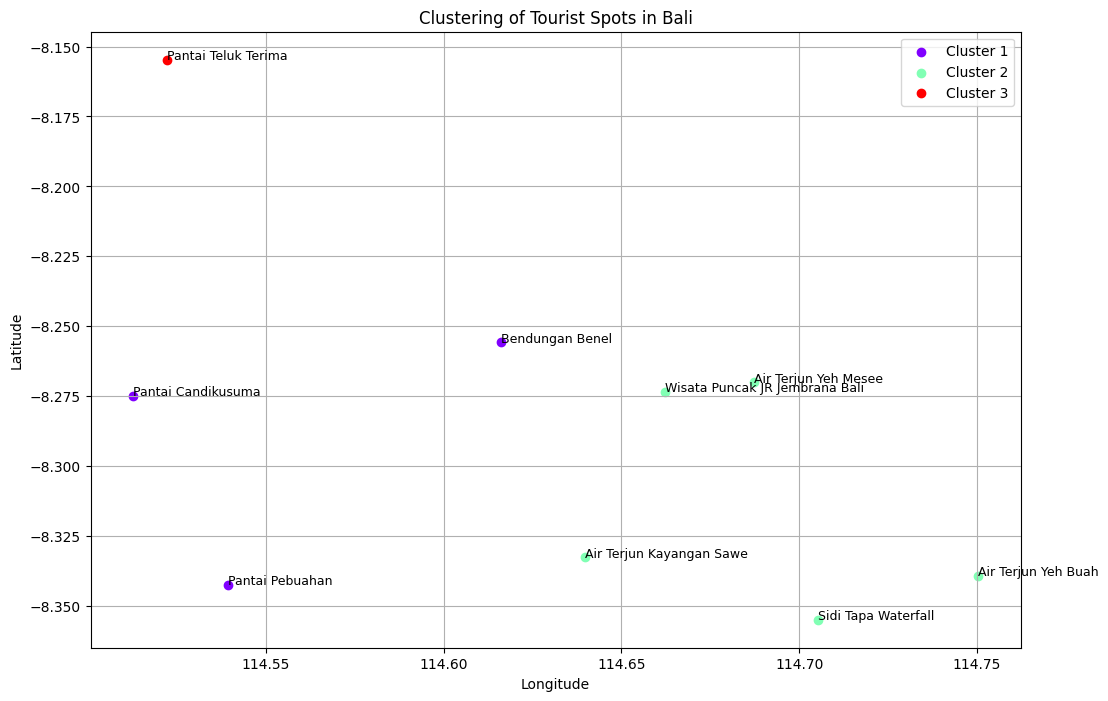

In [14]:
# Visualisasikan hasil clustering
plt.figure(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['long'], cluster_data['lat'], color=colors[cluster], label=f'Cluster {cluster + 1}')
    for i, row in cluster_data.iterrows():
        plt.text(row['long'], row['lat'], row['palce'], fontsize=9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Tourist Spots in Bali')
plt.legend()
plt.grid()
plt.show()

In [20]:
import geopy.distance

# Baca dataset
df2 = pd.read_csv('coordinate.csv', delimiter=';')
selected_indices = [11, 8, 9, 40, 17, 39, 14, 15, 33]
df2 = df2.loc[selected_indices]
# Fungsi untuk mendapatkan matriks jarak menggunakan geopy
def get_distance_matrix(df):
    distances = {}
    for i, place1 in df.iterrows():
        coords_1 = (place1['Lat'], place1['Long'])
        for j, place2 in df.iterrows():
            if i != j:
                coords_2 = (place2['Lat'], place2['Long'])
                distance = geopy.distance.geodesic(coords_1, coords_2).km
                distances[(place1['Place'], place2['Place'])] = distance
    return distances

# Panggil fungsi untuk mendapatkan matriks jarak
distances = get_distance_matrix(df2)

# Print hasil jarak antar tempat wisata
for (place1, place2), distance in distances.items():
    print(f"Jarak dari {place1} ke {place2}: {distance:.2f} km")

Jarak dari Pantai Teluk Terima ke Pantai Candikusuma: 13.32 km
Jarak dari Pantai Teluk Terima ke Pantai Pebuahan: 20.85 km
Jarak dari Pantai Teluk Terima ke Bendungan Benel: 15.24 km
Jarak dari Pantai Teluk Terima ke Air Terjun Kayangan Sawe: 23.55 km
Jarak dari Pantai Teluk Terima ke Wisata Puncak JR Jembrana Bali: 20.27 km
Jarak dari Pantai Teluk Terima ke Air Terjun Yeh Mesee: 22.23 km
Jarak dari Pantai Teluk Terima ke Sidi Tapa Waterfall: 29.96 km
Jarak dari Pantai Teluk Terima ke Air Terjun Yeh Buah: 32.38 km
Jarak dari Pantai Candikusuma ke Pantai Teluk Terima: 13.32 km
Jarak dari Pantai Candikusuma ke Pantai Pebuahan: 8.05 km
Jarak dari Pantai Candikusuma ke Bendungan Benel: 11.60 km
Jarak dari Pantai Candikusuma ke Air Terjun Kayangan Sawe: 15.39 km
Jarak dari Pantai Candikusuma ke Wisata Puncak JR Jembrana Bali: 16.49 km
Jarak dari Pantai Candikusuma ke Air Terjun Yeh Mesee: 19.27 km
Jarak dari Pantai Candikusuma ke Sidi Tapa Waterfall: 23.01 km
Jarak dari Pantai Candikusuma k

In [21]:
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

# Buat graf dengan jarak sebagai bobot
G = nx.Graph()
for (place1, place2), distance in distances.items():
    G.add_edge(place1, place2, weight=distance)

# TSP dengan algoritma Nearest Neighbor
route = traveling_salesman_problem(G, weight='weight')
print("Rute terbaik: ", route)

Rute terbaik:  ['Pantai Teluk Terima', 'Bendungan Benel', 'Wisata Puncak JR Jembrana Bali', 'Air Terjun Yeh Mesee', 'Air Terjun Kayangan Sawe', 'Air Terjun Yeh Buah', 'Sidi Tapa Waterfall', 'Pantai Pebuahan', 'Pantai Candikusuma', 'Pantai Teluk Terima']


Rute terbaik:  ['Pantai Teluk Terima', 'Bendungan Benel', 'Wisata Puncak JR Jembrana Bali', 'Air Terjun Yeh Mesee', 'Air Terjun Kayangan Sawe', 'Air Terjun Yeh Buah', 'Sidi Tapa Waterfall', 'Pantai Pebuahan', 'Pantai Candikusuma', 'Pantai Teluk Terima']


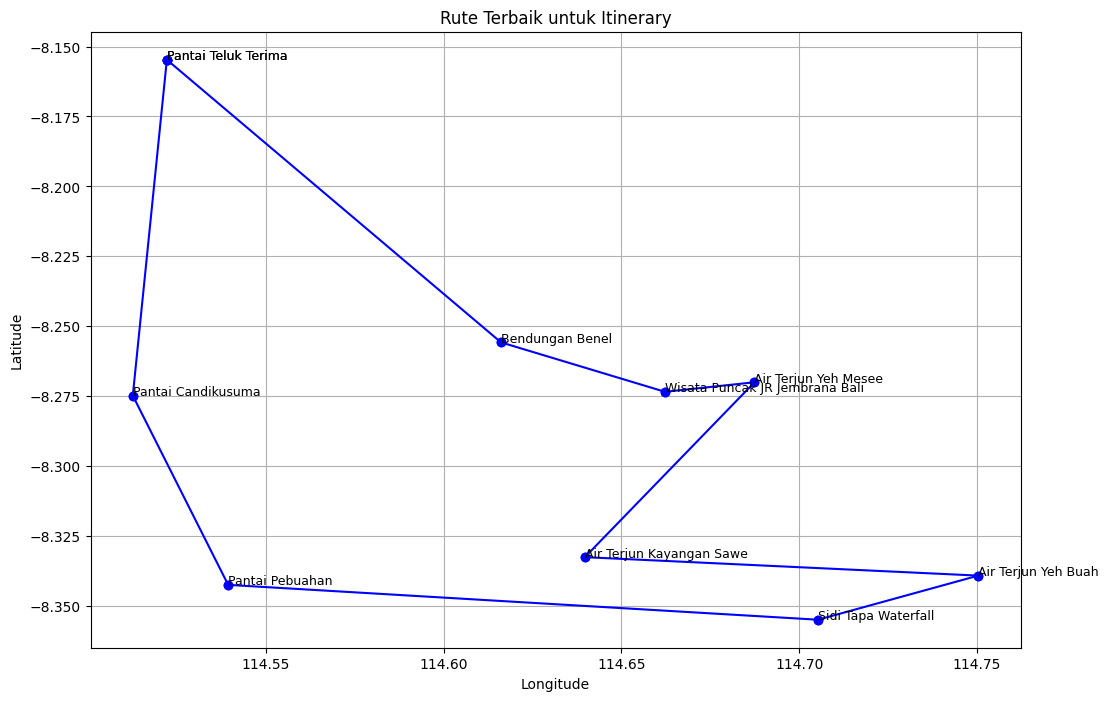

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

# Buat graf dengan jarak sebagai bobot
G = nx.Graph()
for (place1, place2), distance in distances.items():
    G.add_edge(place1, place2, weight=distance)

# TSP dengan algoritma Nearest Neighbor
route = traveling_salesman_problem(G, weight='weight')
print("Rute terbaik: ", route)

# Fungsi untuk mengekstrak koordinat dari dataset
def get_coordinates(place, df):
    row = df[df['Place'] == place]
    if not row.empty:
        return (row.iloc[0]['Lat'], row.iloc[0]['Long'])
    else:
        return None

# Dapatkan koordinat untuk setiap tempat di rute
route_coords = [get_coordinates(place, df2) for place in route]

# Buat plot
plt.figure(figsize=(12, 8))

# Tambahkan edges ke plot
for i in range(len(route_coords) - 1):
    x_values = [route_coords[i][1], route_coords[i+1][1]]
    y_values = [route_coords[i][0], route_coords[i+1][0]]
    plt.plot(x_values, y_values, 'bo-')  # 'bo-' menggambarkan titik biru dengan garis solid

# Tambahkan edge dari tempat terakhir ke tempat pertama untuk menutup rute
x_values = [route_coords[-1][1], route_coords[0][1]]
y_values = [route_coords[-1][0], route_coords[0][0]]
plt.plot(x_values, y_values, 'bo-')

# Tambahkan nama tempat ke plot
for place, (lat, long) in zip(route, route_coords):
    plt.text(long, lat, place, fontsize=9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rute Terbaik untuk Itinerary')
plt.grid()
plt.show()